# Multivariable analysis

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)
n = 500

In [ ]:
# Datos sinteticos
MedInc = np.random.lognormal(mean=2.5, sigma=0.35, size=n)
HouseAge = np.random.randint(1, 52, size=n)
Longitude = -124 + np.random.rand(n) * 10
Latitude = 32 + np.random.rand(n) * 8
AveRooms = 5 + 0.15 * MedInc + 0.032 * HouseAge + np.random.randn(n)

# Target
Target = (
    0.45 * MedInc
    - 0.2 * HouseAge
    - 0.1 * (Longitude + 117)
    - 0.3 * (Latitude - 36)
    + 0.02 * AveRooms
    + np.random.randn(n) * 0.5
)

# DataFrame
df = pd.DataFrame(
    {
        "MedInc": MedInc,
        "HouseAge": HouseAge,
        "Longitude": Longitude,
        "Latitude": Latitude,
        "AveRooms": AveRooms,
        "Target": Target,
    }
)

numeric_cols = df.columns.tolist()

In [3]:
cov_mat = df[numeric_cols].cov()
corr_mat = df[numeric_cols].corr()
print("Covariance Matrix:\n", cov_mat.round(3))
print("\nCorrelation Matrix:\n", corr_mat.round(3))

Covariance Matrix:
            MedInc  HouseAge  Longitude  Latitude  AveRooms  Target
MedInc     22.967    -3.196      0.114     0.694     3.275  10.815
HouseAge   -3.196   222.304     -2.162    -0.080     5.950 -45.072
Longitude   0.114    -2.162      8.644     0.390    -0.140  -0.478
Latitude    0.694    -0.080      0.390     5.031    -0.049  -1.233
AveRooms    3.275     5.950     -0.140    -0.049     1.587   0.341
Target     10.815   -45.072     -0.478    -1.233     0.341  14.467

Correlation Matrix:
            MedInc  HouseAge  Longitude  Latitude  AveRooms  Target
MedInc      1.000    -0.045      0.008     0.065     0.542   0.593
HouseAge   -0.045     1.000     -0.049    -0.002     0.317  -0.795
Longitude   0.008    -0.049      1.000     0.059    -0.038  -0.043
Latitude    0.065    -0.002      0.059     1.000    -0.017  -0.144
AveRooms    0.542     0.317     -0.038    -0.017     1.000   0.071
Target      0.593    -0.795     -0.043    -0.144     0.071   1.000


In [4]:
# Hat-Matrix
y = df["Target"].values.reshape(-1, 1)
X = df[["MedInc", "AveRooms", "HouseAge", "Longitude", "Latitude"]].values


In [6]:
XtX = X.T @ X
XtX_inv = np.linalg.inv(XtX)
beta = XtX_inv @ X.T @ y

y_hat = X @ beta

residuals = y - y_hat

# Hat matrix
H = X @ XtX_inv @ X.T
leverage = np.diag(H)
print(leverage)

[0.00716159 0.00844413 0.01408987 0.02184983 0.00429377 0.00363699
 0.01170095 0.00409888 0.01298956 0.02004416 0.02000181 0.01125825
 0.00234209 0.0090851  0.00677085 0.00391568 0.00444953 0.00703757
 0.00873464 0.01154218 0.00957694 0.00665284 0.00684896 0.01179716
 0.01327239 0.00303293 0.011155   0.00842512 0.00745521 0.00279771
 0.01261319 0.02021371 0.00631714 0.0155859  0.01159935 0.00613634
 0.00510555 0.018697   0.01324469 0.0034197  0.00562677 0.0087702
 0.00501241 0.00784706 0.00864927 0.00821474 0.0072518  0.01550617
 0.00571816 0.0156292  0.00446867 0.00472426 0.00463717 0.00993394
 0.01440882 0.01969    0.00877429 0.01308522 0.00704663 0.00880683
 0.00397642 0.00699333 0.00844003 0.00768161 0.00457698 0.01278514
 0.0114409  0.0070369  0.01081139 0.01271357 0.00682801 0.01261825
 0.00281993 0.01199783 0.01059717 0.01638579 0.00519933 0.0054284
 0.01443269 0.00695402 0.00905185 0.01234914 0.01897185 0.00512142
 0.00639704 0.00597023 0.00463653 0.00645896 0.01089413 0.004916

In [8]:
print("H", H.shape)
print("y", y.shape)
print("X", X.shape)
print("beta", beta.shape)

H (500, 500)
y (500, 1)
X (500, 5)
beta (5, 1)


In [9]:
summary = pd.DataFrame(
    {
        "index": np.arange(n),
        "leverage": leverage,
        "y": y.flatten(),
        "y_hat": y_hat.flatten(),
        "resid": residuals.flatten(),
    }
)

In [10]:
print("Top Ten Leverage Points")
print(summary.sort_values(by="leverage", ascending=False).head(10).round(3))

Top Ten Leverage Points
     index  leverage       y   y_hat  resid
209    209     0.116  21.750  21.696  0.054
478    478     0.049  13.571  13.274  0.298
179    179     0.035   7.907   8.664 -0.757
416    416     0.030   1.694   2.372 -0.678
362    362     0.029  -2.859  -2.313 -0.545
378    378     0.029   7.678   8.334 -0.656
323    323     0.027   5.675   6.347 -0.673
113    113     0.025   6.105   6.019  0.087
234    234     0.025   1.943   2.295 -0.352
247    247     0.025   3.256   3.508 -0.251


In [13]:
n, p = X.shape
print(f"n: {n}, p: {p}")

avg_lev = p / n
threshold = 2 * avg_lev 
print(f"avg_lev: {avg_lev:.3f}")
print(f"threshold: {threshold:.3f}")

n: 500, p: 5
avg_lev: 0.010
threshold: 0.020


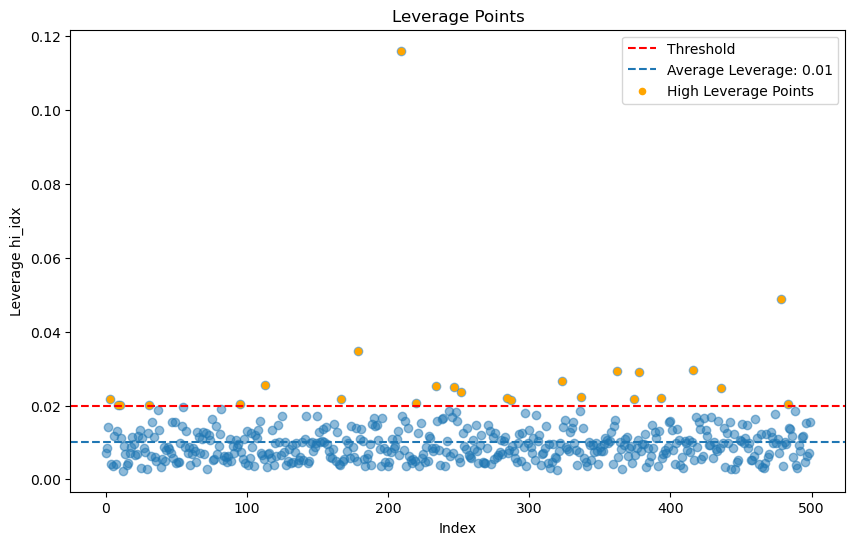

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(summary["index"], summary["leverage"], alpha=0.5)
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.axhline(y=avg_lev, linestyle='--', label=f'Average Leverage: {avg_lev:.2f}')

hi_idx = summary.index[summary["leverage"] > threshold].tolist()
if len(hi_idx) > 0:
    plt.scatter(hi_idx, summary.loc[hi_idx, "leverage"], s=20, color='orange', label='High Leverage Points')
plt.title("Leverage Points")
plt.xlabel('Index')
plt.ylabel('Leverage hi_idx')
plt.legend()
plt.show()